<a href="https://colab.research.google.com/github/Lokuhu/112-2_2LNN/blob/main/%E5%9B%9BD56_HW4_EB_LG_UA_%E8%BD%89_r_EB_LG_UA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Weight-tuning by Epoch Bound or Learning Goal or Undesired Attractor

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
# 試算表>檔案>共用>發布到網路 即可於colab中讀取
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQhbAejyGUXlZltX2nsbC4sTw890L6081piAP8ZDJVbufqZ9xm-S5P7gIrXnpgszm-U9SmEkBxJc5uF/pub?gid=1265524659&single=true&output=csv'
seed = pd.read_csv(url)

In [ ]:
seed['Type'] = seed['Type'].replace(1, 0.0)
seed['Type'] = seed['Type'].replace(2, 1.0)
seed['Type'] = seed['Type'].replace(3, 2.0)
seed

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


In [ ]:
# Split data
X = seed.drop('Type',axis=1).values
y = seed['Type'].values

# 20%test, 80%training
X_train, X_test, y_train, y_test=train_test_split (X, y ,test_size = 0.2, random_state = 30)

# Covert X and y to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Model5 (the best performance on accuracy)

In [ ]:
#hidden nodes = 11, activation function = Tanh, Optimizer = SGD, learning epochs = 300, learning rate = 0.01, momentum = 0.9
class Model5(nn.Module):

    def __init__(self, in_features = 7, h1 = 11, out_features = 3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.out = nn.Linear(h1, out_features)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))  # Use tanh activation
        x = torch.tanh(self.out(x))  # Use tanh activation

        return x

model5 = Model5()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model5.parameters(), lr=0.01, weight_decay=0.001)  # add weight_decay to do regularization

In [ ]:
model5

Model5(
  (fc1): Linear(in_features=7, out_features=11, bias=True)
  (out): Linear(in_features=11, out_features=3, bias=True)
)

In [ ]:
#Train the model5
epochs = 50
error_threshold = 0.005 # the original error_threshold is 0.01
lr = 0.01
t = 0
max_t = 50
losses = []

# training loop
while True:
    optimizer.zero_grad()
    y_pred = model5(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    # print loss after each epoch
    print(f'Epoch {t+1}, Loss: {loss.item()}')

    if loss.item() < error_threshold:
        print(f'Acceptable 2LNN, stopping early at epoch {t}, loss: {loss.item()}')
        break

    if t >= max_t:
        print(f'Unacceptable 2LNN, stop.')
        break


    # Weight adjustment
    optimizer.zero_grad()
    y_pred = model5(X_train)
    current_loss = criterion(y_pred, y_train)
    current_loss.backward()
    optimizer.step()

    # Check if adjusted weight is accepted (UA)
    if current_loss.item() < loss.item():
        optimizer.param_groups[0]['lr'] *= 1.2
        t += 1
    else:
        # Check if the learning rate is below the error threshold
        if optimizer.param_groups[0]['lr'] < error_threshold:
            print('Unacceptable 2LNN, stopping due to low learning rate.')
            break
        optimizer.param_groups[0]['lr'] *= 0.7
        t += 1


Epoch 1, Loss: 1.0947750806808472
Epoch 2, Loss: 1.047569751739502
Epoch 3, Loss: 1.025700569152832
Epoch 4, Loss: 1.023177146911621
Epoch 5, Loss: 1.0206526517868042
Epoch 6, Loss: 1.0176514387130737
Epoch 7, Loss: 1.0140739679336548
Epoch 8, Loss: 1.009795904159546
Epoch 9, Loss: 1.0046602487564087
Epoch 10, Loss: 0.9984707832336426
Epoch 11, Loss: 0.9909921288490295
Epoch 12, Loss: 0.9819540977478027
Epoch 13, Loss: 0.971282958984375
Epoch 14, Loss: 1.0700405836105347
Epoch 15, Loss: 0.9626992344856262
Epoch 16, Loss: 1.1320931911468506
Epoch 17, Loss: 0.9699221849441528
Epoch 18, Loss: 1.1059789657592773
Epoch 19, Loss: 0.9502736330032349
Epoch 20, Loss: 1.027585744857788
Epoch 21, Loss: 0.9512307047843933
Epoch 22, Loss: 0.9829308390617371
Epoch 23, Loss: 0.9361974596977234
Epoch 24, Loss: 0.9460675120353699
Epoch 25, Loss: 0.9199742674827576
Epoch 26, Loss: 0.9165052771568298
Epoch 27, Loss: 0.9242246747016907
Epoch 28, Loss: 0.9089294672012329
Epoch 29, Loss: 0.9070084691047668


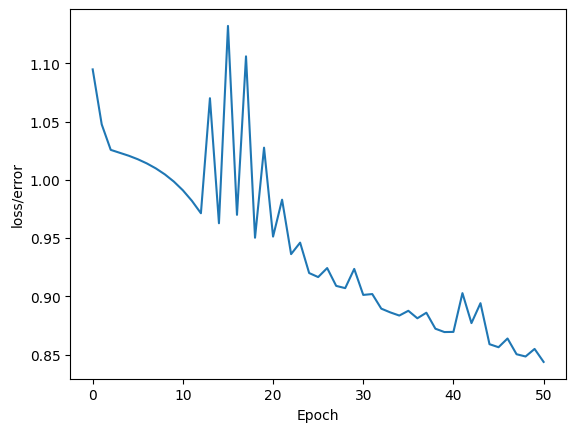

In [ ]:
plt.plot(range(len(losses)), losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')
plt.show()

In [ ]:
loss

tensor(0.8437, grad_fn=<NllLossBackward0>)

In [ ]:
with torch.no_grad():
    correct = 0
    for i, data in enumerate(X_test):
        y_val = model5.forward(data)
        print(f'{i+1}. {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f'Number of correct predictions: {correct}/{len(y_test)}')
print(f'Accuracy: {correct/len(y_test):.2f}')

1. tensor([ 0.3171,  0.3732, -0.4461]) 	 1 	 1
2. tensor([-0.1615, -0.3335,  0.3725]) 	 2 	 2
3. tensor([-0.2581, -0.4613,  0.5160]) 	 2 	 2
4. tensor([ 0.3738,  0.4534, -0.5328]) 	 1 	 1
5. tensor([ 0.3698,  0.4479, -0.5267]) 	 0 	 1
6. tensor([-0.1366, -0.2991,  0.3331]) 	 2 	 2
7. tensor([ 0.1345,  0.1013, -0.1363]) 	 0 	 0
8. tensor([ 0.3141,  0.3688, -0.4411]) 	 0 	 1
9. tensor([-0.2725, -0.4797,  0.5362]) 	 2 	 2
10. tensor([ 0.3186,  0.3754, -0.4485]) 	 1 	 1
11. tensor([ 0.3608,  0.4353, -0.5133]) 	 0 	 1
12. tensor([ 0.3695,  0.4475, -0.5264]) 	 1 	 1
13. tensor([ 0.3102,  0.3633, -0.4353]) 	 1 	 1
14. tensor([ 0.3575,  0.4307, -0.5085]) 	 0 	 1
15. tensor([-0.2409, -0.4396,  0.4924]) 	 2 	 2
16. tensor([ 0.2424,  0.2637, -0.3234]) 	 2 	 1
17. tensor([-0.0104, -0.1171,  0.1210]) 	 2 	 2
18. tensor([-0.2879, -0.4986,  0.5566]) 	 2 	 2
19. tensor([ 0.2750,  0.3120, -0.3781]) 	 0 	 1
20. tensor([-0.2283, -0.4230,  0.4736]) 	 2 	 2
21. tensor([ 0.3047,  0.3551, -0.4254]) 	 2 	 1
2